In [36]:
#Importing dependences
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load data into a pandas dataframe
data = pd.read_excel(r'Desktop/dtt.xlsx')
data.drop('Mean square error', axis=1, inplace=True)


# separate the independent variables (X) from the dependent variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
data.head()
#y = 2 * X[:,0] - 3 * X[:,1] + 0.5 * X[:,2] + np.random.randn(144)

,Attenuation,Input power,Noise Factor,SNR
0,0.14,5,2,25.09
1,0.14,10,2,29.96
2,0.14,15,2,35.97
3,0.14,20,2,38.72
4,0.14,25,2,41.72


In [37]:
# standardize the independent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# apply multiple linear regression on the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# check the accuracy of the model on the testing set
accuracy = regressor.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9511756073562978


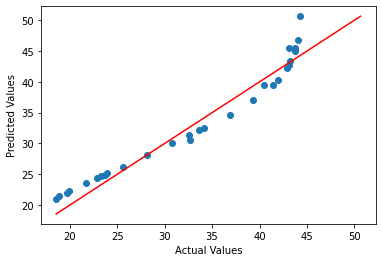

In [38]:
# Make predictions using the model
y_pred = regressor.predict(X_test)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a line for perfect correlation
y_min = np.min(np.concatenate((y_test, y_pred)))
y_max = np.max(np.concatenate((y_test, y_pred)))
plt.plot([y_min, y_max], [y_min, y_max], color='red')
plt.savefig('C:/Users/sushant/OneDrive/Desktop/RA.png')
plt.show()

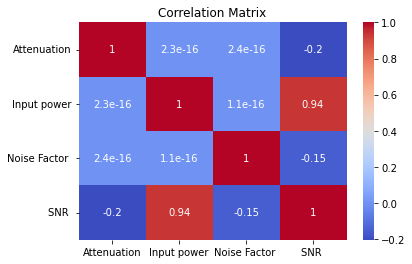

In [40]:
# plot the heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()